In [38]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
# Data exploration
df1 = pd.read_csv('telcom_data.csv')

In [4]:
df1

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311450e+19,04-04-2019 12:01,770.0,25-04-2019 14:35,662.0,1823652.0,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,15854611.0,2501332.00,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,36749741.0,308879636.0
1,1.311450e+19,09-04-2019 13:04,235.0,25-04-2019 08:15,606.0,1365104.0,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,20247395.0,19111729.00,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,53800391.0,653384965.0
2,1.311450e+19,09-04-2019 17:42,1.0,25-04-2019 11:58,652.0,1361762.0,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,19725661.0,14699576.00,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,27883638.0,279807335.0
3,1.311450e+19,10-04-2019 00:31,486.0,25-04-2019 07:36,171.0,1321509.0,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,21388122.0,15146643.00,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,43324218.0,846028530.0
4,1.311450e+19,12-04-2019 20:10,565.0,25-04-2019 10:40,954.0,1089009.0,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,15259380.0,18962873.00,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,29-04-2019 07:28,451.0,30-04-2019 06:02,214.0,81230.0,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,16191667.0,11763428.00,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,57628851.0,574175259.0
149997,7.349880e+18,29-04-2019 07:28,483.0,30-04-2019 10:41,187.0,97970.0,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,13877234.0,8288284.00,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,39135081.0,666648844.0
149998,1.311450e+19,29-04-2019 07:28,283.0,30-04-2019 10:46,810.0,98249.0,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,22660510.0,1855903.00,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,34912224.0,592786405.0
149999,1.311450e+19,29-04-2019 07:28,696.0,30-04-2019 10:40,327.0,97910.0,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,8817106.0,8305402.00,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,29626096.0,371895920.0


In [5]:
df2 = pd.read_csv('Field_Descriptions.csv')

In [6]:
df2

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR ...
4,End,End time of the xDR (last frame timestamp)
5,End ms,Milliseconds offset of end time of the xDR (la...
6,Dur. (s),Total Duration of the xDR (in s)
7,IMSI,International Mobile Subscriber Identity
8,MSISDN/Number,MS International PSTN/ISDN Number of mobile - ...
9,IMEI,International Mobile Equipment Identity


In [7]:
# Task-1 user overview analysis
# identifying the top 10 handsets used by the customers
top_10_handsets = df1['Handset Type'].value_counts().head(10)

In [8]:
top_10_handsets

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

In [9]:
# identifying the top 3 handset manufacturers
top_3_manufacturers = df1['Handset Manufacturer'].value_counts().head(3)

In [10]:
top_3_manufacturers

Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

In [11]:
# identifying the top 5 handsets per top 3 handset manufacturer
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df1[df1['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

In [12]:
top_5_handsets_per_manufacturer

{'Apple': Apple iPhone 6S (A1688)    9419
 Apple iPhone 6 (A1586)     9023
 Apple iPhone 7 (A1778)     6326
 Apple iPhone Se (A1723)    5187
 Apple iPhone 8 (A1905)     4993
 Name: Handset Type, dtype: int64,
 'Samsung': Samsung Galaxy S8 (Sm-G950F)    4520
 Samsung Galaxy A5 Sm-A520F      3724
 Samsung Galaxy J5 (Sm-J530)     3696
 Samsung Galaxy J3 (Sm-J330)     3484
 Samsung Galaxy S7 (Sm-G930X)    3199
 Name: Handset Type, dtype: int64,
 'Huawei': Huawei B528S-23A                  19752
 Huawei E5180                       2079
 Huawei P20 Lite Huawei Nova 3E     2021
 Huawei P20                         1480
 Huawei Y6 2018                      997
 Name: Handset Type, dtype: int64}

In [16]:
# short interpretation and recommendation to marketing teams
print("Top 10 handsets used by customers:")
print(top_10_handsets)
print("\nTop 3 handset manufacturers:")
print(top_3_manufacturers)
print("\nTop 5 handsets per top 3 handset manufacturers:")
for manufacturer, top_5_handsets in top_5_handsets_per_manufacturer.items():
    print(f"\n{manufacturer}:")
    print(top_5_handsets)

Top 10 handsets used by customers:
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64

Top 3 handset manufacturers:
Apple      59565
Samsung    40839
Huawei     34423
Name: Handset Manufacturer, dtype: int64

Top 5 handsets per top 3 handset manufacturers:

Apple:
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: Handset Type, dtype: int64

Samsung:
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-

In [13]:
# Convertion of date columns to datetime
df1['Start'] = pd.to_datetime(df1['Start'])
df1['End'] = pd.to_datetime(df1['End'])

In [14]:
df1['Start']

0        2019-04-04 12:01:00
1        2019-09-04 13:04:00
2        2019-09-04 17:42:00
3        2019-10-04 00:31:00
4        2019-12-04 20:10:00
                 ...        
149996   2019-04-29 07:28:00
149997   2019-04-29 07:28:00
149998   2019-04-29 07:28:00
149999   2019-04-29 07:28:00
150000                   NaT
Name: Start, Length: 150001, dtype: datetime64[ns]

In [15]:
df1['End']

0        2019-04-25 14:35:00
1        2019-04-25 08:15:00
2        2019-04-25 11:58:00
3        2019-04-25 07:36:00
4        2019-04-25 10:40:00
                 ...        
149996   2019-04-30 06:02:00
149997   2019-04-30 10:41:00
149998   2019-04-30 10:46:00
149999   2019-04-30 10:40:00
150000                   NaT
Name: End, Length: 150001, dtype: datetime64[ns]

In [16]:
# Calculate session duration
df1['Session Duration'] = (df1['End'] - df1['Start']).dt.total_seconds()

In [17]:
df1['Session Duration']

0          1823640.0
1        -11422140.0
2        -11425440.0
3        -13971300.0
4        -19301400.0
             ...    
149996       81240.0
149997       97980.0
149998       98280.0
149999       97920.0
150000           NaN
Name: Session Duration, Length: 150001, dtype: float64

In [18]:
#Identifying the total download (DL) and upload (UL) data
aggregated_df = df1.groupby('MSISDN/Number').agg({'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'})

In [19]:
aggregated_df

,Total DL (Bytes),Total UL (Bytes)
MSISDN/Number,,
3.360100e+10,8.426375e+08,36053108.0
3.360100e+10,1.207552e+08,36104459.0
3.360100e+10,5.566597e+08,39306820.0
3.360101e+10,4.019932e+08,20327526.0
3.360101e+10,1.363130e+09,94280527.0
...,...,...
3.379000e+10,6.879252e+08,26716429.0
3.379000e+10,4.445751e+08,35732243.0
3.197020e+12,1.948281e+08,37295915.0


In [20]:
# Calculate total data volume (in Bytes) during each session for each application
df1['Total Data Volume (Bytes)'] = df1[['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                                      'Google DL (Bytes)', 'Google UL (Bytes)',
                                      'Email DL (Bytes)', 'Email UL (Bytes)',
                                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                                      'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                                      'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
                                      'Other DL (Bytes)', 'Other UL (Bytes)']].sum(axis=1)

In [21]:
df1['Total Data Volume (Bytes)']

0         5.173738e+08
1         1.234090e+09
2         7.183836e+08
3         1.638393e+09
4         1.158391e+09
              ...     
149996    6.350686e+08
149997    1.417964e+09
149998    7.487995e+08
149999    1.216235e+09
150000    9.168652e+08
Name: Total Data Volume (Bytes), Length: 150001, dtype: float64

In [34]:
# Data Cleaning
# Replace missing values with the mean of the corresponding column
df1.fillna(df1.mean(), inplace=True)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1756\2543605664.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df1.fillna(df1.mean(), inplace=True)
C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1756\2543605664.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.fillna(df1.mean(), inplace=True)


In [35]:
df1

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration,Total Data Volume (Bytes)
0,1.311450e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,1.823652e+06,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,3.674974e+07,3.088796e+08,1.823640e+06,5.173738e+08
1,1.311450e+19,2019-09-04 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,1.365104e+06,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,5.380039e+07,6.533850e+08,-1.142214e+07,1.234090e+09
2,1.311450e+19,2019-09-04 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,1.361762e+06,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,2.788364e+07,2.798073e+08,-1.142544e+07,7.183836e+08
3,1.311450e+19,2019-10-04 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,1.321509e+06,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,4.332422e+07,8.460285e+08,-1.397130e+07,1.638393e+09
4,1.311450e+19,2019-12-04 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,1.089009e+06,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,3.854281e+07,5.691386e+08,-1.930140e+07,1.158391e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,2019-04-29 07:28:00,451.0000,2019-04-30 06:02:00,214.00000,8.123000e+04,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,5.762885e+07,5.741753e+08,8.124000e+04,6.350686e+08
149997,7.349880e+18,2019-04-29 07:28:00,483.0000,2019-04-30 10:41:00,187.00000,9.797000e+04,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,3.913508e+07,6.666488e+08,9.798000e+04,1.417964e+09
149998,1.311450e+19,2019-04-29 07:28:00,283.0000,2019-04-30 10:46:00,810.00000,9.824900e+04,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,3.491222e+07,5.927864e+08,9.828000e+04,7.487995e+08
149999,1.311450e+19,2019-04-29 07:28:00,696.0000,2019-04-30 10:40:00,327.00000,9.791000e+04,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,2.962610e+07,3.718959e+08,9.792000e+04,1.216235e+09


In [24]:
# Basic metrices of telcom datasets
df1.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration,Total Data Volume (Bytes)
count,1.500010e+05,150001.000000,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,150001.000000,150001.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082017e+14,4.188282e+10,4.847454e+13,109.795706,17.662883,13300.045927,...,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08,1.013247e+05,9.168652e+08
std,2.883597e+18,288.610872,288.096693,8.103735e+04,2.145201e+10,2.438731e+12,2.237359e+13,559.342620,76.529933,23971.798635,...,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127635e+07,2.441421e+08,2.357093e+05,3.442942e+08
min,6.917540e+18,0.000000,0.000000,7.142000e+03,2.040470e+14,3.360100e+10,4.400150e+11,0.000000,0.000000,0.000000,...,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06,-1.931574e+07,5.836229e+07
25%,7.349880e+18,250.000000,251.000000,5.744200e+04,2.082010e+14,3.365151e+10,3.546260e+13,35.000000,3.000000,43.000000,...,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322203e+07,2.431072e+08,5.742000e+04,6.699686e+08
50%,7.349880e+18,499.000000,500.000000,8.639900e+04,2.082020e+14,3.366380e+10,3.572240e+13,54.000000,7.000000,63.000000,...,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08,8.640000e+04,9.170596e+08
75%,1.304240e+19,749.000000,750.000000,1.324300e+05,2.082020e+14,3.368473e+10,8.611970e+13,109.795706,17.662883,19710.000000,...,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08,1.323600e+05,1.164283e+09
max,1.318650e+19,999.000000,999.000000,1.859336e+06,2.140740e+14,8.823970e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08,1.823640e+06,1.780674e+09


In [25]:
# Non-Graphical Univariate Analysis
# Compute variance for each quantitative variable
Variance = df1.var()

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1756\3519890351.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Variance = df1.var()


In [26]:
df1.var()

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1756\2870725145.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.var()


Bearer Id                                   8.315130e+36
Start ms                                    8.329624e+04
End ms                                      8.299970e+04
Dur. (ms)                                   6.567052e+09
IMSI                                        4.601889e+20
MSISDN/Number                               5.947409e+24
IMEI                                        5.005777e+26
Avg RTT DL (ms)                             3.128642e+05
Avg RTT UL (ms)                             5.856831e+03
Avg Bearer TP DL (kbps)                     5.746471e+08
Avg Bearer TP UL (kbps)                     2.139377e+07
TCP DL Retrans. Vol (Bytes)                 1.374418e+16
TCP UL Retrans. Vol (Bytes)                 2.488873e+14
DL TP < 50 Kbps (%)                         1.691358e+02
50 Kbps < DL TP < 250 Kbps (%)              3.843494e+01
250 Kbps < DL TP < 1 Mbps (%)               1.721478e+01
DL TP > 1 Mbps (%)                          2.320097e+01
UL TP < 10 Kbps (%)            

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [50]:
# Calculate total number of cells in dataframe
totalCells = np.product(df1.shape)

In [51]:
totalCells

8550057

In [45]:
# Count number of missing values per column
missingCount = df1.isnull().sum()

In [46]:
missingCount

Bearer Id                                        0
Start                                            1
Start ms                                         0
End                                              1
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                            1153
Avg RTT DL (ms)                                  0
Avg RTT UL (ms)                                  0
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                      0
TCP UL Retrans. Vol (Bytes)                      0
DL TP < 50 Kbps (%)                              0
50 Kbps < DL TP < 250 Kbps (%)                   0
250 Kbps < DL TP < 1 Mbps (%)                    0
DL TP > 1 Mbps (%)             

In [47]:
 # Calculate total number of missing values
totalMissing = missingCount.sum()

In [48]:
totalMissing

152300

In [52]:
 # Calculate percentage of missing values
print("The telcom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

The telcom dataset contains 1.78 % missing values.


In [53]:
# Now which column(s) has missing values
df1.isna().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         0
End                                              1
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                            1153
Avg RTT DL (ms)                                  0
Avg RTT UL (ms)                                  0
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                      0
TCP UL Retrans. Vol (Bytes)                      0
DL TP < 50 Kbps (%)                              0
50 Kbps < DL TP < 250 Kbps (%)                   0
250 Kbps < DL TP < 1 Mbps (%)                    0
DL TP > 1 Mbps (%)             

In [54]:
# drop columns with more than 30% missing values
df3 = df1.drop(['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)'], axis=1)

In [55]:
df3

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Session Duration,Total Data Volume (Bytes)
0,1.311450e+19,2019-04-04 12:01:00,770.0000,2019-04-25 14:35:00,662.00000,1.823652e+06,2.082010e+14,3.366496e+10,3.552120e+13,9.16457E+15,...,8198936.00,9656251.00,278082303.0,1.434415e+07,171744450.0,8.814393e+06,3.674974e+07,3.088796e+08,1.823640e+06,None
1,1.311450e+19,2019-09-04 13:04:00,235.0000,2019-04-25 08:15:00,606.00000,1.365104e+06,2.082020e+14,3.368185e+10,3.579400e+13,L77566A,...,18338413.00,17227132.00,608750074.0,1.170709e+06,526904238.0,1.505514e+07,5.380039e+07,6.533850e+08,-1.142214e+07,None
2,1.311450e+19,2019-09-04 17:42:00,1.0000,2019-04-25 11:58:00,652.00000,1.361762e+06,2.082000e+14,3.376063e+10,3.528150e+13,D42335A,...,17587794.00,6163408.00,229584621.0,3.956300e+05,410692588.0,4.215763e+06,2.788364e+07,2.798073e+08,-1.142544e+07,None
3,1.311450e+19,2019-10-04 00:31:00,486.0000,2019-04-25 07:36:00,171.00000,1.321509e+06,2.082010e+14,3.375034e+10,3.535660e+13,T21824A,...,13994646.00,1097942.00,799538153.0,1.084972e+07,749039933.0,1.279728e+07,4.332422e+07,8.460285e+08,-1.397130e+07,None
4,1.311450e+19,2019-12-04 20:10:00,565.0000,2019-04-25 10:40:00,954.00000,1.089009e+06,2.082010e+14,3.369980e+10,3.540700e+13,D88865A,...,17124581.00,415218.00,527707248.0,3.529801e+06,550709500.0,1.391032e+07,3.854281e+07,5.691386e+08,-1.930140e+07,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277830e+18,2019-04-29 07:28:00,451.0000,2019-04-30 06:02:00,214.00000,8.123000e+04,2.082020e+14,3.365069e+10,3.548310e+13,D20434A,...,17883703.00,19678161.00,526609673.0,9.197207e+06,3264510.0,1.348742e+07,5.762885e+07,5.741753e+08,8.124000e+04,None
149997,7.349880e+18,2019-04-29 07:28:00,483.0000,2019-04-30 10:41:00,187.00000,9.797000e+04,2.082020e+14,3.366345e+10,3.566050e+13,D10223C,...,19350146.00,21293148.00,626893062.0,4.735033e+06,712180387.0,2.457758e+06,3.913508e+07,6.666488e+08,9.798000e+04,None
149998,1.311450e+19,2019-04-29 07:28:00,283.0000,2019-04-30 10:46:00,810.00000,9.824900e+04,2.082020e+14,3.362189e+10,3.572120e+13,T51102A,...,9963942.00,5065760.00,553539484.0,1.339432e+07,121100856.0,1.131473e+07,3.491222e+07,5.927864e+08,9.828000e+04,None
149999,1.311450e+19,2019-04-29 07:28:00,696.0000,2019-04-30 10:40:00,327.00000,9.791000e+04,2.082020e+14,3.361962e+10,8.618620e+13,L88342B,...,3322253.00,13172589.00,352536971.0,2.529475e+06,814713113.0,1.406930e+06,2.962610e+07,3.718959e+08,9.792000e+04,None


In [56]:
df3.shape

(150001, 52)

C:\Users\Rakesh\AppData\Local\Temp\ipykernel_1756\701921494.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')


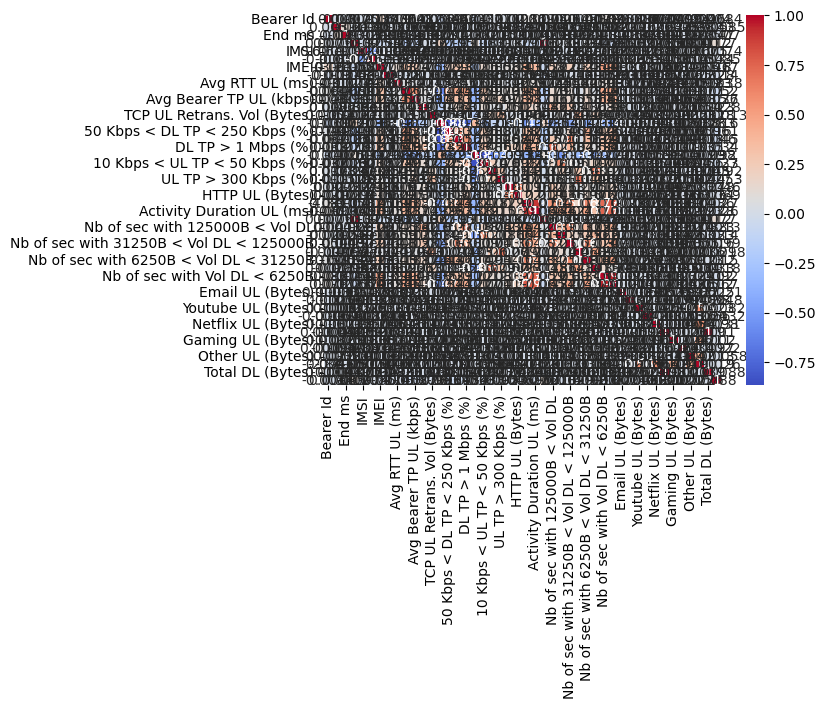

In [58]:
# Bivariate Analysis
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm')
plt.show()

In [60]:
# Variable Transformations of telcom dataset
df1['Total Duration'] = df1['Session Duration'] * df1['Bearer Id']
df1['Decile Class'] = pd.qcut(df1['Total Duration'], q=5, labels=False)

In [61]:
df1['Total Duration']

0         2.391613e+25
1        -1.497957e+26
2        -1.498389e+26
3        -1.832266e+26
4        -2.531282e+26
              ...     
149996    5.912509e+23
149997    7.201412e+23
149998    1.288893e+24
149999    1.284172e+24
150000    1.027318e+24
Name: Total Duration, Length: 150001, dtype: float64

In [62]:
df1['Decile Class']

0         4
1         0
2         0
3         0
4         0
         ..
149996    1
149997    2
149998    3
149999    3
150000    2
Name: Decile Class, Length: 150001, dtype: int64

In [63]:
# Correlation Analysis
correlation_matrix = df1[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
                         'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
                         'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)',
                         'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']].corr()

In [64]:
correlation_matrix

,Social Media DL (Bytes),Google DL (Bytes),Email DL (Bytes),Youtube DL (Bytes),Netflix DL (Bytes),Gaming DL (Bytes),Other DL (Bytes),Social Media UL (Bytes),Google UL (Bytes),Email UL (Bytes),Youtube UL (Bytes),Netflix UL (Bytes),Gaming UL (Bytes),Other UL (Bytes)
Social Media DL (Bytes),1.000000,-0.001954,0.004745,-0.001389,-0.001817,0.001018,0.006126,-0.000555,0.000186,-0.002518,0.002345,0.003457,0.003095,0.000610
Google DL (Bytes),-0.001954,1.000000,-0.000039,0.001760,0.000548,-0.001421,-0.002557,0.003542,-0.000103,0.000742,0.000638,-0.001569,-0.001429,-0.000882
Email DL (Bytes),0.004745,-0.000039,1.000000,0.001679,0.001351,0.000050,-0.000444,0.004823,-0.001157,0.002553,-0.004305,-0.000016,-0.004335,0.004675
Youtube DL (Bytes),-0.001389,0.001760,0.001679,1.000000,0.001202,-0.001861,0.002042,-0.001786,0.001122,-0.000320,0.002433,0.001746,-0.001893,-0.004830
Netflix DL (Bytes),-0.001817,0.000548,0.001351,0.001202,1.000000,-0.003201,-0.006000,-0.000772,-0.001288,-0.000011,0.000423,0.001065,-0.000633,-0.002588
Gaming DL (Bytes),0.001018,-0.001421,0.000050,-0.001861,-0.003201,1.000000,-0.002591,0.000210,0.001140,-0.002519,-0.002382,-0.001051,0.001162,-0.001131
Other DL (Bytes),0.006126,-0.002557,-0.000444,0.002042,-0.006000,-0.002591,1.000000,-0.003850,0.002097,-0.003805,0.002296,-0.006691,-0.002381,0.003421
Social Media UL (Bytes),-0.000555,0.003542,0.004823,-0.001786,-0.000772,0.000210,-0.003850,1.000000,0.001085,-0.001427,-0.002368,-0.002493,0.000844,0.000971
Google UL (Bytes),0.000186,-0.000103,-0.001157,0.001122,-0.001288,0.001140,0.002097,0.001085,1.000000,-0.002050,0.001670,-0.004073,-0.002516,-0.002219
Email UL (Bytes),-0.002518,0.000742,0.002553,-0.000320,-0.000011,-0.002519,-0.003805,-0.001427,-0.002050,1.000000,-0.006834,0.000532,0.005000,0.000081


In [65]:
 # Dimensionality Reduction (PCA) of telcom dataset
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)',
            'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
            'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 'Youtube UL (Bytes)',
            'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

In [66]:
features

['Social Media DL (Bytes)',
 'Google DL (Bytes)',
 'Email DL (Bytes)',
 'Youtube DL (Bytes)',
 'Netflix DL (Bytes)',
 'Gaming DL (Bytes)',
 'Other DL (Bytes)',
 'Social Media UL (Bytes)',
 'Google UL (Bytes)',
 'Email UL (Bytes)',
 'Youtube UL (Bytes)',
 'Netflix UL (Bytes)',
 'Gaming UL (Bytes)',
 'Other UL (Bytes)']

In [67]:
# Standardization of the features of telcom dataset
x = df1.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [68]:
x

array([[-2.41006158e-01, -1.24393069e+00,  1.71051502e+00, ...,
        -2.11574883e-01,  1.26618281e+00,  1.15243234e-01],
       [ 1.26309900e-01, -6.82009663e-01, -1.12245838e+00, ...,
         9.78914688e-01, -1.48822074e+00,  1.42385468e+00],
       [-1.07456349e-01,  8.41411312e-01,  8.67340083e-01, ...,
        -7.60809928e-01, -1.65028017e+00, -8.49034764e-01],
       ...,
       [-5.30649938e-01, -5.74135162e-01, -2.56792439e-01, ...,
        -9.33410514e-01,  1.06758427e+00,  6.39533945e-01],
       [-9.59724864e-01, -4.71725312e-01,  4.21438440e-01, ...,
         3.41354652e-01, -1.20411958e+00, -1.43801363e+00],
       [ 3.41224727e-10, -8.66296055e-11, -1.93079970e-11, ...,
         5.66080561e-11,  5.57560872e-11, -8.94665634e-11]])

In [69]:
# PCA of telcom dataset
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
principal_df1 = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

In [70]:
principal_df1

,Principal Component 1,Principal Component 2
0,8.641448e-01,1.406962e-01
1,-1.521860e+00,1.436097e+00
2,5.238752e-01,2.230997e-01
3,-7.302952e-01,-7.594746e-01
4,-4.278036e-01,-1.131740e+00
...,...,...
149996,3.546204e-01,3.985949e-01
149997,-1.557329e+00,9.539072e-01
149998,6.210148e-01,-9.805740e-02
149999,-7.261509e-01,-5.699165e-01


In [71]:
# Concatenation with the target variable
final_df1 = pd.concat([principal_df1, df1[['Decile Class']]], axis=1)

In [72]:
final_df1

,Principal Component 1,Principal Component 2,Decile Class
0,8.641448e-01,1.406962e-01,4
1,-1.521860e+00,1.436097e+00,0
2,5.238752e-01,2.230997e-01,0
3,-7.302952e-01,-7.594746e-01,0
4,-4.278036e-01,-1.131740e+00,0
...,...,...,...
149996,3.546204e-01,3.985949e-01,1
149997,-1.557329e+00,9.539072e-01,2
149998,6.210148e-01,-9.805740e-02,3
149999,-7.261509e-01,-5.699165e-01,3


In [76]:
# Task-2 User engangement analysis
# Calculation of session frequency
df1['Session Frequency'] = (df1['End'] - df1['Start']).dt.total_seconds()

In [77]:
df1['Session Frequency']

0          1823640.0
1        -11422140.0
2        -11425440.0
3        -13971300.0
4        -19301400.0
             ...    
149996       81240.0
149997       97980.0
149998       98280.0
149999       97920.0
150000           NaN
Name: Session Frequency, Length: 150001, dtype: float64

In [78]:
# Calculation of session total traffic
df1['Session Total Traffic'] = df1['Total DL (Bytes)'] + df1['Total UL (Bytes)']

In [79]:
df1['Session Total Traffic']

0         3.456294e+08
1         7.071854e+08
2         3.076910e+08
3         8.893527e+08
4         6.076814e+08
              ...     
149996    6.318041e+08
149997    7.057839e+08
149998    6.276986e+08
149999    4.015220e+08
150000    4.957646e+08
Name: Session Total Traffic, Length: 150001, dtype: float64

In [81]:
# Aggregate metrics per customer ID (MSISDN)
aggregated_df1 = df1.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count', 
    'Session Duration': 'sum',
    'Session Total Traffic': 'sum'
    })

In [82]:
aggregated_df1

,Bearer Id,Session Duration,Session Total Traffic
MSISDN/Number,,,
3.360100e+10,1,116760.0,8.786906e+08
3.360100e+10,1,181260.0,1.568596e+08
3.360100e+10,1,135000.0,5.959665e+08
3.360101e+10,1,49920.0,4.223207e+08
3.360101e+10,2,37200.0,1.457411e+09
...,...,...,...
3.379000e+10,1,141000.0,4.803073e+08
4.188282e+10,1066,72447720.0,5.317447e+11
3.197020e+12,1,877380.0,2.321240e+08


In [85]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [86]:
# Normalization of the aggregated metrics
scaler = MinMaxScaler()
normalized_df1 = pd.DataFrame(scaler.fit_transform(aggregated_df1), columns=aggregated_df1.columns)

In [87]:
normalized_df1

,Bearer Id,Session Duration,Session Total Traffic
0,0.000000,0.456307,0.001590
1,0.000000,0.456792,0.000232
2,0.000000,0.456444,0.001058
3,0.000000,0.455804,0.000732
4,0.000939,0.455709,0.002678
...,...,...,...
106852,0.000000,0.456489,0.000841
106853,1.000000,1.000000,1.000000
106854,0.000000,0.462024,0.000374
106855,0.000000,0.457331,0.001059


In [88]:
# Running of k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_df1)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [89]:
# Add cluster labels to the dataframe
aggregated_df1['Cluster'] = kmeans.labels_

In [90]:
 # Report the top 10 customers per engaged user
top_10_frequency = aggregated_df1.sort_values(by='Bearer Id', ascending=False).head(10)
top_10_duration = aggregated_df1.sort_values(by='Session Duration', ascending=False).head(10)
top_10_traffic = aggregated_df1.sort_values(by='Session Total Traffic', ascending=False).head(10)

In [91]:
top_10_frequency

,Bearer Id,Session Duration,Session Total Traffic,Cluster
MSISDN/Number,,,,
4.188282e+10,1066,72447720.0,5.317447e+11,1
3.362632e+10,18,8792280.0,7.971167e+09,0
3.362578e+10,17,-60588660.0,8.499621e+09,2
3.361489e+10,17,9967200.0,8.846226e+09,0
3.365973e+10,16,4035240.0,7.705863e+09,0
3.367588e+10,15,4865640.0,7.891111e+09,0
3.376054e+10,15,-46880340.0,8.514774e+09,2
3.366716e+10,13,8744580.0,5.618394e+09,0
3.360452e+10,12,5208060.0,5.487855e+09,0


In [92]:
top_10_duration

,Bearer Id,Session Duration,Session Total Traffic,Cluster
MSISDN/Number,,,,
4.188282e+10,1066,72447720.0,5.317447e+11,1
3.361489e+10,17,9967200.0,8.846226e+09,0
3.362632e+10,18,8792280.0,7.971167e+09,0
3.366716e+10,13,8744580.0,5.618394e+09,0
3.366469e+10,9,6288540.0,5.682007e+09,0
3.360313e+10,12,6288000.0,4.976195e+09,0
3.366746e+10,6,5650080.0,2.600522e+09,0
3.376041e+10,12,5321820.0,7.132371e+09,0
3.365922e+10,8,5306040.0,4.657403e+09,0


In [93]:
top_10_traffic

,Bearer Id,Session Duration,Session Total Traffic,Cluster
MSISDN/Number,,,,
4.188282e+10,1066,72447720.0,5.317447e+11,1
3.361489e+10,17,9967200.0,8.846226e+09,0
3.376054e+10,15,-46880340.0,8.514774e+09,2
3.362578e+10,17,-60588660.0,8.499621e+09,2
3.362632e+10,18,8792280.0,7.971167e+09,0
3.367588e+10,15,4865640.0,7.891111e+09,0
3.365973e+10,16,4035240.0,7.705863e+09,0
3.366646e+10,11,4536960.0,7.308501e+09,0
3.376041e+10,12,5321820.0,7.132371e+09,0


In [94]:
# Computation the minimum, maximum, average & total non-normalized metrics for each cluster
cluster_metrics = aggregated_df1.groupby('Cluster').agg({
    'Bearer Id': ['min', 'max', 'mean', 'sum'],
    'Session Duration': ['min', 'max', 'mean', 'sum'],
    'Session Total Traffic': ['min', 'max', 'mean', 'sum']
})

In [95]:
cluster_metrics

Bearer Id                            Session Duration              \
              min   max         mean     sum              min         max   
Cluster                                                                     
0               1    18     1.393313  148863      -11425440.0   9967200.0   
1            1066  1066  1066.000000    1066       72447720.0  72447720.0   
2               1    17     4.800000      72      -60588660.0 -13971300.0   

                                    Session Total Traffic                \
                 mean           sum                   min           max   
Cluster                                                                   
0        1.450429e+05  1.549653e+10          3.324901e+07  8.846226e+09   
1        7.244772e+07  7.244772e+07          5.317447e+11  5.317447e+11   
2       -2.468428e+07 -3.702642e+08          3.704210e+08  8.514774e+09   

                                     
                 mean           sum  
Cluster                              
0        6.907166e+08  7.379685e+13  
1        5.317447e+11  5.317447e+11  
2        2.439830e+09  3.659745e+10

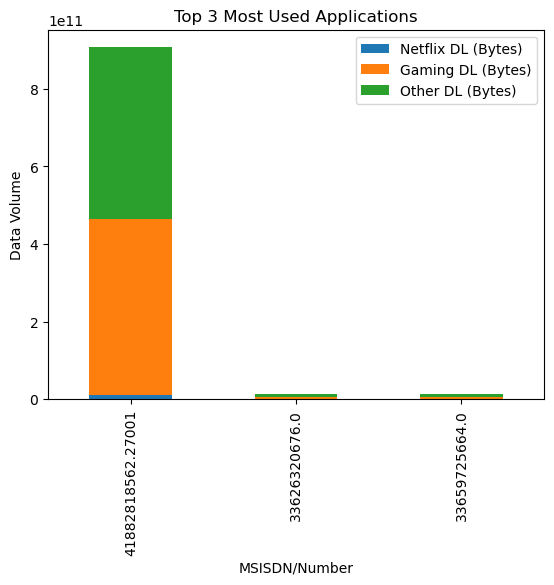

In [96]:
# Plot the top 3 most used applications
top_3_apps = df1[['MSISDN/Number', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']]
top_3_apps = top_3_apps.groupby('MSISDN/Number').sum().sort_values(by=['Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)'], ascending=False).head(3)
top_3_apps.plot(kind='bar', stacked=True)
plt.xlabel('MSISDN/Number')
plt.ylabel('Data Volume')
plt.title('Top 3 Most Used Applications')
plt.show()

In [97]:
# Determination the optimized value of k using the elbow method
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalized_df1)
    distortions.append(kmeanModel.inertia_)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\

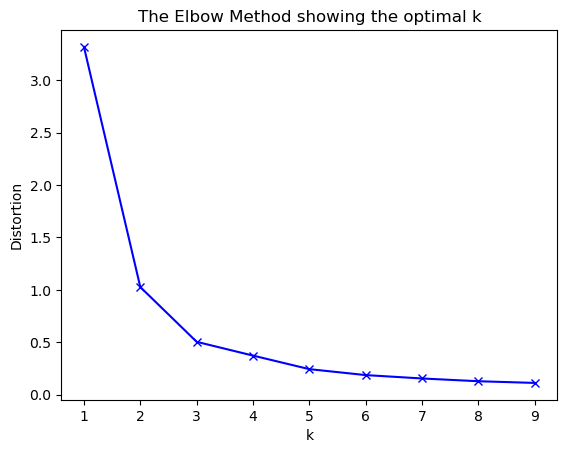

In [98]:
# Plot the elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [105]:
# Task-3 User experience analysis
# Replace missing values with the mean or mode of the corresponding variable
df1['Avg RTT DL (ms)'] = df1['Avg RTT DL (ms)'].fillna(df1['Avg RTT DL (ms)'].mean())

In [106]:
df1['Avg RTT DL (ms)']

0          42.000000
1          65.000000
2         109.795706
3         109.795706
4         109.795706
             ...    
149996     32.000000
149997     27.000000
149998     43.000000
149999     37.000000
150000    109.795706
Name: Avg RTT DL (ms), Length: 150001, dtype: float64

In [108]:
df1['Handset Type'] = df1['Handset Type'].fillna(df1['Handset Type'].mode()[0])

In [109]:
df1['Handset Type']

0          Samsung Galaxy A5 Sm-A520F
1         Samsung Galaxy J5 (Sm-J530)
2            Samsung Galaxy A8 (2018)
3                           undefined
4                    Samsung Sm-G390F
                     ...             
149996    Apple iPhone 8 Plus (A1897)
149997        Apple iPhone Se (A1723)
149998        Apple iPhone Xs (A2097)
149999                 Huawei Fig-Lx1
150000               Huawei B528S-23A
Name: Handset Type, Length: 150001, dtype: object

In [110]:
df1['TCP DL Retrans. Vol (Bytes)'] = df1['TCP DL Retrans. Vol (Bytes)'].fillna(df1['TCP DL Retrans. Vol (Bytes)'].mean())

In [111]:
df1['TCP DL Retrans. Vol (Bytes)']

0         2.080991e+07
1         2.080991e+07
2         2.080991e+07
3         2.080991e+07
4         2.080991e+07
              ...     
149996    2.080991e+07
149997    2.080991e+07
149998    2.080991e+07
149999    2.080991e+07
150000    2.080991e+07
Name: TCP DL Retrans. Vol (Bytes), Length: 150001, dtype: float64

In [112]:
df1['Activity Duration DL (ms)'] = df1['Activity Duration DL (ms)'].fillna(df1['Activity Duration DL (ms)'].mean())

In [113]:
df1['Activity Duration DL (ms)']

0         3.762400e+04
1         1.680000e+02
2         0.000000e+00
3         3.330000e+03
4         0.000000e+00
              ...     
149996    4.237600e+04
149997    1.726400e+04
149998    2.500300e+04
149999    1.340500e+04
150000    1.829177e+06
Name: Activity Duration DL (ms), Length: 150001, dtype: float64

In [115]:
# Aggregate the required metrics per customer
aggregated_df1 = df1.groupby('MSISDN/Number').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Handset Type': 'first',
    'Activity Duration DL (ms)': 'mean'
    })

In [116]:
aggregated_df1

,TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Handset Type,Activity Duration DL (ms)
MSISDN/Number,,,,
3.360100e+10,2.080991e+07,46.000000,Huawei P20 Lite Huawei Nova 3E,2.658800e+04
3.360100e+10,2.080991e+07,30.000000,Apple iPhone 7 (A1778),4.928300e+04
3.360100e+10,2.080991e+07,109.795706,undefined,1.679300e+04
3.360101e+10,1.066000e+03,69.000000,Apple iPhone 5S (A1457),1.209700e+04
3.360101e+10,1.507977e+07,57.000000,Apple iPhone Se (A1723),2.321454e+06
...,...,...,...,...
3.379000e+10,2.080991e+07,34.000000,Apple iPhone 8 Plus (A1897),3.343500e+04
4.188282e+10,1.655032e+07,288.542407,undefined,1.079629e+06
3.197020e+12,2.080991e+07,109.795706,Quectel Wireless. Quectel Ec25-E,0.000000e+00


In [117]:
# Report the aggregated information per customer
print(aggregated_df1)

               TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
MSISDN/Number                                                 
3.360100e+10                  2.080991e+07        46.000000   
3.360100e+10                  2.080991e+07        30.000000   
3.360100e+10                  2.080991e+07       109.795706   
3.360101e+10                  1.066000e+03        69.000000   
3.360101e+10                  1.507977e+07        57.000000   
...                                    ...              ...   
3.379000e+10                  2.080991e+07        34.000000   
4.188282e+10                  1.655032e+07       288.542407   
3.197020e+12                  2.080991e+07       109.795706   
3.370000e+14                  2.080991e+07       109.795706   
8.823970e+14                  2.080991e+07       109.795706   

                                   Handset Type  Activity Duration DL (ms)  
MSISDN/Number                                                               
3.360100e+10     Huawei P2

In [118]:
# Computation the top 10 and bottom 10 TCP values
top_10_tcp = df1['TCP DL Retrans. Vol (Bytes)'].value_counts().nlargest(10)
bottom_10_tcp = df1['TCP DL Retrans. Vol (Bytes)'].value_counts().nsmallest(10)

In [119]:
top_10_tcp

2.080991e+07    88146
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: TCP DL Retrans. Vol (Bytes), dtype: int64

In [120]:
bottom_10_tcp

3351.0       1
41413.0      1
24849.0      1
46935.0      1
498374.0     1
103615.0     1
2333575.0    1
9897.0       1
22569.0      1
173346.0     1
Name: TCP DL Retrans. Vol (Bytes), dtype: int64

In [121]:
# Computation of the top 10 and bottom 10 RTT values
top_10_rtt = df1['Avg RTT DL (ms)'].value_counts().nlargest(10)
bottom_10_rtt = df1['Avg RTT DL (ms)'].value_counts().nsmallest(10)

In [122]:
top_10_rtt

109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: Avg RTT DL (ms), dtype: int64

In [123]:
bottom_10_rtt

1271.0     1
1793.0     1
1892.0     1
2280.0     1
1222.0     1
1912.0     1
1518.0     1
1896.0     1
912.0      1
10679.0    1
Name: Avg RTT DL (ms), dtype: int64

In [124]:
# Computation of the top 10 and bottom 10 Throughput values
top_10_throughput = df1['Activity Duration DL (ms)'].value_counts().nlargest(10)
bottom_10_throughput = df1['Activity Duration DL (ms)'].value_counts().nsmallest(10)

In [125]:
top_10_throughput

0.0      7278
1.0        21
654.0      13
2.0        13
636.0      13
508.0      13
711.0      12
541.0      11
895.0      11
476.0      11
Name: Activity Duration DL (ms), dtype: int64

In [126]:
bottom_10_throughput

1336695.0     1
6249172.0     1
1068640.0     1
10187012.0    1
624980.0      1
17563369.0    1
105187.0      1
2469736.0     1
215776.0      1
174614.0      1
Name: Activity Duration DL (ms), dtype: int64

In [127]:
# Printing of the TCP values
print("Top 10 TCP values:")
print(top_10_tcp)
print("\nBottom 10 TCP values:")
print(bottom_10_tcp)

Top 10 TCP values:
2.080991e+07    88146
1.330000e+03      433
2.660000e+03      219
3.800000e+01      200
9.200000e+01      192
1.318000e+03      156
5.430000e+02      133
3.990000e+03      114
7.600000e+01      108
5.320000e+03      102
Name: TCP DL Retrans. Vol (Bytes), dtype: int64

Bottom 10 TCP values:
3351.0       1
41413.0      1
24849.0      1
46935.0      1
498374.0     1
103615.0     1
2333575.0    1
9897.0       1
22569.0      1
173346.0     1
Name: TCP DL Retrans. Vol (Bytes), dtype: int64


In [128]:
# Printing of the RTT values
print("\nTop 10 RTT values:")
print(top_10_rtt)
print("\nBottom 10 RTT values:")
print(bottom_10_rtt)


Top 10 RTT values:
109.795706    27829
28.000000      3553
27.000000      3380
34.000000      3296
35.000000      2892
37.000000      2718
36.000000      2645
38.000000      2547
29.000000      2498
26.000000      2488
Name: Avg RTT DL (ms), dtype: int64

Bottom 10 RTT values:
1271.0     1
1793.0     1
1892.0     1
2280.0     1
1222.0     1
1912.0     1
1518.0     1
1896.0     1
912.0      1
10679.0    1
Name: Avg RTT DL (ms), dtype: int64


In [129]:
# Printing of the throughput values
print("\nTop 10 Throughput values:")
print(top_10_throughput)
print("\nBottom 10 Throughput values:")
print(bottom_10_throughput)


Top 10 Throughput values:
0.0      7278
1.0        21
654.0      13
2.0        13
636.0      13
508.0      13
711.0      12
541.0      11
895.0      11
476.0      11
Name: Activity Duration DL (ms), dtype: int64

Bottom 10 Throughput values:
1336695.0     1
6249172.0     1
1068640.0     1
10187012.0    1
624980.0      1
17563369.0    1
105187.0      1
2469736.0     1
215776.0      1
174614.0      1
Name: Activity Duration DL (ms), dtype: int64


In [131]:
# Computation of the distribution of the average throughput per handset type
avg_throughput_per_handset = df1.groupby('Handset Type')['Activity Duration DL (ms)'].mean()

In [132]:
avg_throughput_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             9.572900e+04
A-Link Telecom I. Cubot Note Plus                                                      4.414390e+05
A-Link Telecom I. Cubot Note S                                                         4.099155e+06
A-Link Telecom I. Cubot Nova                                                           3.254200e+05
A-Link Telecom I. Cubot Power                                                          1.391610e+05
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    5.330150e+04
Zyxel Communicat. Lte7460                                                              4.023855e+07
Zyxel Communicat. Sbg3600                                                              4.334677e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [133]:
# Compute the average TCP retransmission per handset type
avg_tcp_retransmission_per_handset = df1.groupby('Handset Type')['TCP DL Retrans. Vol (Bytes)'].mean()

In [134]:
avg_tcp_retransmission_per_handset

Handset Type
A-Link Telecom I. Cubot A5                                                             2.080991e+07
A-Link Telecom I. Cubot Note Plus                                                      6.023490e+05
A-Link Telecom I. Cubot Note S                                                         4.134448e+07
A-Link Telecom I. Cubot Nova                                                           1.358400e+05
A-Link Telecom I. Cubot Power                                                          7.799000e+03
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    1.040629e+07
Zyxel Communicat. Lte7460                                                              2.384303e+07
Zyxel Communicat. Sbg3600                                                              5.020084e+07
Zyxel Communicat. Zyxel Wah7706                                                        

In [135]:
# Printing of the results
print("Distribution of the average throughput per handset type:")
print(avg_throughput_per_handset)
print("\nAverage TCP retransmission per handset type:")
print(avg_tcp_retransmission_per_handset)

Distribution of the average throughput per handset type:
Handset Type
A-Link Telecom I. Cubot A5                                                             9.572900e+04
A-Link Telecom I. Cubot Note Plus                                                      4.414390e+05
A-Link Telecom I. Cubot Note S                                                         4.099155e+06
A-Link Telecom I. Cubot Nova                                                           3.254200e+05
A-Link Telecom I. Cubot Power                                                          1.391610e+05
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809    5.330150e+04
Zyxel Communicat. Lte7460                                                              4.023855e+07
Zyxel Communicat. Sbg3600                                                              4.334677e+07
Zyxel Communicat. Zyxel Wah770

In [137]:
# Droping of the missing values
df1.dropna(subset=['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Activity Duration DL (ms)'], inplace=True)

In [138]:
# Normalization of the data
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Activity Duration DL (ms)']])

In [141]:
scaled_data

array([[ 3.17762137e-17, -1.21206448e-01, -3.14508504e-01],
       [ 3.17762137e-17, -8.00866120e-02, -3.21083934e-01],
       [ 3.17762137e-17,  0.00000000e+00, -3.21113426e-01],
       ...,
       [ 3.17762137e-17, -1.19418629e-01, -3.16724130e-01],
       [ 3.17762137e-17, -1.30145543e-01, -3.18760168e-01],
       [ 3.17762137e-17,  0.00000000e+00,  0.00000000e+00]])

In [142]:
# Performing the k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [143]:
df1['Cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: Cluster, Length: 150001, dtype: int32

In [144]:
# Analyzing the clusters
cluster_summary = df1.groupby('Cluster').agg({
    'TCP DL Retrans. Vol (Bytes)': 'mean',
    'Avg RTT DL (ms)': 'mean',
    'Activity Duration DL (ms)': 'mean'
})

In [145]:
cluster_summary

,TCP DL Retrans. Vol (Bytes),Avg RTT DL (ms),Activity Duration DL (ms)
Cluster,,,
0,1.461885e+07,109.229033,8.425615e+05
1,2.659845e+09,112.483333,2.673898e+07
2,6.296702e+07,123.087936,2.417285e+07


In [146]:
print(cluster_summary)

         TCP DL Retrans. Vol (Bytes)  Avg RTT DL (ms)  \
Cluster                                                 
0                       1.461885e+07       109.229033   
1                       2.659845e+09       112.483333   
2                       6.296702e+07       123.087936   

         Activity Duration DL (ms)  
Cluster                             
0                     8.425615e+05  
1                     2.673898e+07  
2                     2.417285e+07  


In [156]:
# Task-4- Satisfaction analysis
# Calculatation of the centroids of the clusters
from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean

In [157]:
centroids = kmeans.cluster_centers_

In [158]:
centroids

array([[-5.28071148e-02, -1.01746686e-03, -1.73316341e-01],
       [ 2.25106028e+01,  4.80499097e-03,  4.37293559e+00],
       [ 3.59009096e-01,  2.38344077e-02,  3.91978538e+00]])

In [159]:
# Calculatation of the Euclidean distance between each user's data point and the centroids of the clusters
df1['Engagement Score'] = np.linalg.norm(scaled_data - centroids[df1['Cluster']], axis=1)

In [160]:
df1['Engagement Score']

0         0.192793
1         0.175715
2         0.156951
3         0.156401
4         0.156951
            ...   
149996    0.203842
149997    0.212971
149998    0.193322
149999    0.201536
150000    0.181185
Name: Engagement Score, Length: 150001, dtype: float64

In [161]:
# Assigning the less engaged cluster
less_engaged_cluster = np.argmin(np.bincount(df1['Cluster']))

In [162]:
less_engaged_cluster

1

In [163]:
# Calculatation of the Euclidean distance between each user's data point and the centroids of the less engaged cluster
df1['Experience Score'] = np.linalg.norm(scaled_data - centroids[less_engaged_cluster], axis=1)

In [164]:
df1['Experience Score']

0         22.993809
1         22.994962
2         22.994812
3         22.994692
4         22.994812
            ...    
149996    22.993744
149997    22.994700
149998    22.994251
149999    22.994727
150000    22.931416
Name: Experience Score, Length: 150001, dtype: float64

In [165]:
# Reporting of the engagement and experience scores
print(df1[['MSISDN/Number', 'Engagement Score', 'Experience Score']])

        MSISDN/Number  Engagement Score  Experience Score
0        3.366496e+10          0.192793         22.993809
1        3.368185e+10          0.175715         22.994962
2        3.376063e+10          0.156951         22.994812
3        3.375034e+10          0.156401         22.994692
4        3.369980e+10          0.156951         22.994812
...               ...               ...               ...
149996   3.365069e+10          0.203842         22.993744
149997   3.366345e+10          0.212971         22.994700
149998   3.362189e+10          0.193322         22.994251
149999   3.361962e+10          0.201536         22.994727
150000   4.188282e+10          0.181185         22.931416

[150001 rows x 3 columns]


In [166]:
# Calculatation of the satisfaction score
df1['Satisfaction Score'] = (df1['Engagement Score'] + df1['Experience Score']) / 2

In [167]:
df1['Satisfaction Score']

0         11.593301
1         11.585338
2         11.575881
3         11.575546
4         11.575881
            ...    
149996    11.598793
149997    11.603836
149998    11.593786
149999    11.598131
150000    11.556301
Name: Satisfaction Score, Length: 150001, dtype: float64

In [168]:
# Reporting of the top 10 satisfied customers
top_10_satisfied_customers = df1.sort_values(by='Satisfaction Score', ascending=False).head(10)

In [169]:
top_10_satisfied_customers

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Session Duration,Total Data Volume (Bytes),Total Duration,Decile Class,Session Frequency,Session Total Traffic,Cluster,Engagement Score,Experience Score,Satisfaction Score
30155,7.349880e+18,2019-04-24 11:18:00,967.0,2019-04-26 10:02:00,101.0,168242.0,2.082020e+14,3.366232e+10,3.560850e+13,L16149B,...,168240.0,None,1.236544e+24,3,168240.0,243009794.0,0,173.085570,174.600503,173.843036
29916,7.349880e+18,2019-04-24 10:51:00,746.0,2019-04-26 07:49:00,789.0,161903.0,2.082020e+14,3.366087e+10,3.553930e+13,D19121A,...,161880.0,None,1.189799e+24,3,161880.0,735051035.0,0,115.369428,117.632331,116.500879
17894,1.013887e+19,2019-04-24 19:34:00,812.0,2019-04-24 23:06:00,207.0,12692.0,2.082017e+14,4.188282e+10,4.847454e+13,NaN,...,12720.0,None,1.289664e+23,0,12720.0,225433964.0,0,99.584810,102.199371,100.892090
5963,1.304240e+19,2019-04-24 11:06:00,102.0,2019-04-24 23:31:00,252.0,44731.0,2.082020e+14,3.368369e+10,3.526580e+13,9.16457E+15,...,44700.0,None,5.829953e+23,1,44700.0,665895211.0,0,97.861419,100.560748,99.211084
22839,1.268210e+19,2019-04-24 20:39:00,642.0,2019-04-24 23:08:00,106.0,8907.0,2.082010e+14,3.376094e+10,3.599480e+13,G30437A,...,8940.0,None,1.133780e+23,0,8940.0,100220137.0,0,48.024148,53.303335,50.663742
23442,6.917540e+18,2019-04-24 20:47:00,212.0,2019-04-24 23:03:00,50.0,8158.0,2.082010e+14,3.360679e+10,3.552200e+13,G79839A,...,8160.0,None,5.644713e+22,0,8160.0,284432644.0,0,46.735369,52.157354,49.446362
1361,1.304240e+19,2019-04-24 01:25:00,277.0,2019-04-25 01:25:00,251.0,86399.0,2.082020e+14,3.369855e+10,8.637690e+13,D21033C,...,86400.0,None,1.126863e+24,2,86400.0,459441213.0,0,46.061345,51.528987,48.795166
81256,1.268210e+19,2019-04-27 09:01:00,898.0,2019-04-28 00:34:00,887.0,55989.0,2.082010e+14,3.367182e+10,3.595210e+13,C13839A,...,55980.0,None,7.099440e+23,2,55980.0,632976531.0,0,45.576732,51.043513,48.310122
97312,6.917540e+18,2019-04-27 16:52:00,249.0,2019-04-28 01:08:00,724.0,29796.0,2.082000e+14,3.378187e+10,3.594830e+13,U64079A,...,29760.0,None,2.058660e+23,0,29760.0,356092307.0,0,45.169234,50.757853,47.963543
100575,1.311450e+19,2019-04-25 17:31:00,932.0,2019-04-29 10:00:00,29.0,318551.0,2.082010e+14,3.378401e+10,3.560790e+13,T88926C,...,318540.0,None,4.177493e+24,4,318540.0,884468011.0,0,44.023086,49.660200,46.841643


In [170]:
print(top_10_satisfied_customers[['MSISDN/Number', 'Satisfaction Score']])

        MSISDN/Number  Satisfaction Score
30155    3.366232e+10          173.843036
29916    3.366087e+10          116.500879
17894    4.188282e+10          100.892090
5963     3.368369e+10           99.211084
22839    3.376094e+10           50.663742
23442    3.360679e+10           49.446362
1361     3.369855e+10           48.795166
81256    3.367182e+10           48.310122
97312    3.378187e+10           47.963543
100575   3.378401e+10           46.841643


In [171]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [173]:
# Defining the features and target variable
X = df1[['TCP DL Retrans. Vol (Bytes)', 'Avg RTT DL (ms)', 'Activity Duration DL (ms)']]
y = df1['Satisfaction Score']

In [174]:
# Spliting of the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Building the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [176]:
# Predicttion of the satisfaction scores for the test set
y_pred = model.predict(X_test)

In [177]:
y_pred

array([11.56572033, 11.64201373, 11.61908953, ..., 11.64201373,
       11.64203378, 11.54580911])

In [178]:
# Evaluattion of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.08205129646917143


In [179]:
# Normalizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1[['Engagement Score', 'Experience Score']])

In [180]:
scaled_data

array([[-0.18703548,  0.01805971],
       [-0.20183473,  0.01924927],
       [-0.218095  ,  0.0190943 ],
       ...,
       [-0.18657761,  0.01851586],
       [-0.17945971,  0.01900683],
       [-0.19709427, -0.04632432]])

In [181]:
# Performing the k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\Rakesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [182]:
df1['Cluster']

0         0
1         0
2         0
3         0
4         0
         ..
149996    0
149997    0
149998    0
149999    0
150000    0
Name: Cluster, Length: 150001, dtype: int32

In [183]:
# Reporting the clusters
print(df1[['Engagement Score', 'Experience Score', 'Cluster']])

        Engagement Score  Experience Score  Cluster
0               0.192793         22.993809        0
1               0.175715         22.994962        0
2               0.156951         22.994812        0
3               0.156401         22.994692        0
4               0.156951         22.994812        0
...                  ...               ...      ...
149996          0.203842         22.993744        0
149997          0.212971         22.994700        0
149998          0.193322         22.994251        0
149999          0.201536         22.994727        0
150000          0.181185         22.931416        0

[150001 rows x 3 columns]


In [185]:
# Aggregation of the average satisfaction and experience scores per cluster
cluster_summary = df1.groupby('Cluster').agg({
    'Satisfaction Score': 'mean',
    'Experience Score': 'mean'
    })

In [187]:
# Reporting the results
print(cluster_summary)

         Satisfaction Score  Experience Score
Cluster                                      
0                 11.689511         22.973620
1                122.611772        123.748238
